<a href="https://colab.research.google.com/github/Rushikesh-Chavan-777/Computational-Methods-In-Material-Science/blob/main/Metropolis_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Monte Carlo Method

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import random

### Probability given using Boltzmann factor

$ρ_{i} \propto exp(−E_{i}/k_{\mathrm{B}}T)$

### Metropolis algorithm
1. Suppose the system starts in configuration $i$ with total energy $E_i$.
2. A trial move is made to configuration $i + 1$, and $\Delta E_{i,i+1} = E_{i+1} − E_{i}$ is calculated.
3. Decide whether to accept or reject the trial move:
   - If $\Delta E_{i,i+1} ≤ 0$, then the relative probability $ρ_{i+1}/ρ_{i} ≥ 1$, so the trial move is accepted
and added to the trajectory.
   - If $\Delta E_{i,i+1} > 0$, then the move will be accepted with probability $exp(−\Delta E/k_{\mathrm{B}}T)$. That
decision is made by first generating a random number R between $(0,1)$. If $R ≤ exp(−\Delta E/k_{\mathrm{B}}T)$ then the move is accepted and if $R > exp(−\Delta E/k_{\mathrm{B}}T)$, then the move is rejected.
4. If the trial move is accepted, then the next configuration in the trajectory is the new state $(i + 1)$.
5. If, however, the trial move is rejected, the next configuration is taken to be the same as configuration $i$.
6. Repeat.

Note:
- When considered over many trials the metropolis algorithm yields the correct result.
- The key to the __Monte Carlo method__ discussed in this chapter is a very clever way to sample only those configurations that are most likely.

#### Algorithm: Metropolis  Harmonic oscillator in 1D

In [2]:
# Algorithm: Metropolis  Harmonic oscillator in 1D

# np.random.ranf() calculates one random number in the range 0 - 1

n = 20000                         # number of samples
deltax= 0.4                       # max displacement
kB    = 1.38e-5                   # in kg/nm^2/s^2/K == 1.38e^(-23) J/k
nm    = 1e-9
T     = 300.0
kBT   = kB*T
Etot  = 0.0                       # initial <E>
k     = 10.0                      # force constant
V = lambda x: 0.5*k*x**2          # potential energy PE
x1= 0.0                           # first guess of x
E1= V(x1)                         # first guess of PE

for i in range(n):                # start loop step(2)
    x2 = x1 + (np.random.ranf()-0.5)*deltax       #new x position
    E2 = V(x2)                                    # new PE
    DeltaE = E2 - E1                              # energy difference
    # next line is Metropolis parts(2) in algorithm
    if DeltaE <= 0.0 or np.exp(-DeltaE/kBT) > np.random.ranf() :
        x1= x2                    # save new configuration
        E1= E2                    # save new energy
        pass
    Etot = Etot + E1              # always add to total
    pass
Eav = nm**2*Etot/n;               # average step (5) & put back into real units

print('{:s} {:8.4g}'.format('average E=',Eav) )

average E= 2.07e-21


#### 1D-Ising Model with Metropolis Algorithm

In [3]:
## 1D-Ising Model with Metropolis Algorithm

In [4]:
L = 5
N = 10
kB = 1.38e-23 # Joules/Kelvin
Etot = 0.
avgE = 0.

## Assuming
J = 1.0e-23 # Joules
T = 2 #Kelvin
beta = J/(kB*T)

print(beta)

0.3623188405797101


In [5]:
randindex = np.random.randint(L,size=N, dtype=int)
print(randindex)

[1 2 3 2 4 0 4 2 3 3]


In [6]:
s = np.zeros(L,dtype=int)
s

array([0, 0, 0, 0, 0])

In [7]:
## Initialize spin
for i in range(len(s)):
    s[i] = 1

print(s)

[1 1 1 1 1]


In [8]:
np.sum(s)

5

In [9]:
sum = 0.
for i in range(len(s)):
    if i+1 > len(s)-1:
        sum = sum + s[i]*s[0]
    else:
        sum = sum + s[i]*s[i+1]

print(sum)

5.0


In [10]:
E1 = -1*beta*sum
print(E1)

-1.8115942028985503


In [11]:
for k in range(N):
    index = randindex[k]
    s[index] = -1*s[index]
    sum = 0.
    for i in range(len(s)):
        if i+1 > len(s)-1:
            sum = sum + s[i]*s[0]
        else:
            sum = sum + s[i]*s[i+1]
    E2 = -1*beta*sum
    deltaE = E2-E1
    if deltaE <= 0. or np.random.ranf() < np.exp(-1*deltaE):
        E1 = E2
    else:
        s[index]= -1*s[index]
    Etot = Etot + E1

In [12]:
avgE = Etot/N
print(avgE)

-0.5072463768115941


In [13]:
def Ising1D(L, N, T):
    J = 1.38e-23 # Joules
    kB = 1.38e-23 # Joules/Kelvin
    beta = J/(kB*T)
    Etot = 0.
    Mtot = 0.
    Ctot = 0.

    randindex = np.random.randint(L,size=N, dtype=int)
    s = np.zeros(L,dtype=int)

    ##Initialize FM-configuration
    for i in range(len(s)):
        s[i] = 1

    ##Calcuate inital total spin
    S1 = np.sum(s)

    ##Calculate initial energy
    sum = 0.
    for i in range(len(s)):
        if i+1 > len(s)-1:
            sum = sum + s[i]*s[0]
        else:
            sum = sum + s[i]*s[i+1]

    E1 = -1*beta*sum
    C1 = sum

    Etot = Etot + E1
    Mtot = Mtot + S1

    ##change configuration + Evalue dE + Metropolis algorithm
    for k in range(N):
        index = randindex[k]
        s[index] = -1*s[index]
        sum = 0.
        for i in range(len(s)):
            if i+1 > len(s)-1:
                sum = sum + s[i]*s[0]
            else:
                sum = sum + s[i]*s[i+1]

        E2 = -1*beta*sum
        S2 = np.sum(s)
        C2 = sum

        deltaE = E2-E1
        if deltaE <= 0. or np.random.ranf() < np.exp(-1*deltaE):
            E1 = E2
            S1 = S2
            C1 = C2
        else:
            s[index]= -1*s[index]

        Etot = Etot + E1
        Mtot = Mtot + S1
        Ctot = Ctot + C1

    return Etot, Mtot, Ctot

In [14]:
# L = 3
# N = 5
# T = 2
# avgE = 0.

# Etotal, Mtotal = Ising1D(L, N, T)
# avgE = Etotal/N
# avgM = Mtotal/N

# print(avgE, avgM)

In [15]:
L = 10
N = 5000
T = np.linspace(0.1, 5, 100)
avgE = np.zeros(len(T), dtype='float64')
avgM = np.zeros(len(T), dtype='float64')
avgC = np.zeros(len(T), dtype='float64')

for i in range(len(T)):
    Etotal, Mtotal, Ctotal = Ising1D(L, N, T[i])
    avgE[i] = Etotal/N
    avgM[i] = Mtotal/N
    avgC[i] = Ctotal/N

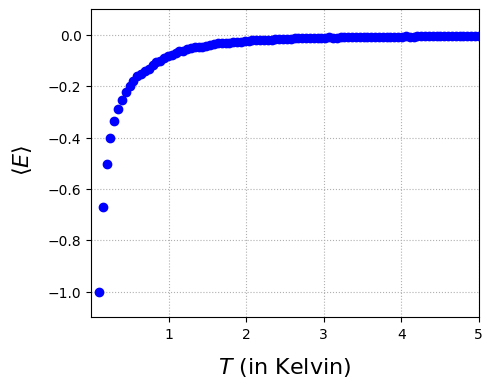

In [16]:
#Average energy
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(T, avgE/np.abs(np.min(avgE)), marker='o', color='blue', ls='none')

ax.set_ylim(-1.1, 0.1)
ax.set_xlim(0.001, 5)

ax.set_xlabel('$T$ (in Kelvin)', fontsize=16, labelpad=10)
ax.set_ylabel(r" $\langle E \rangle$", fontsize=16, labelpad=10)

ax.grid(ls=':')

plt.show()

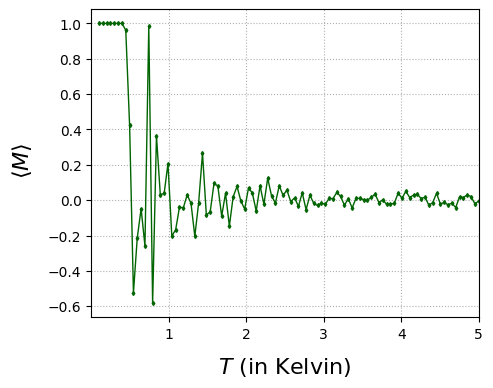

In [17]:
#Net magnetization
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(T, avgM/avgM[0], marker='d', ls='-', ms=2, lw=1, color='darkgreen')

# ax.set_ylim(-1.1, 0.1)
ax.set_xlim(0.001, 5)

ax.set_xlabel('$T$ (in Kelvin)', fontsize=16, labelpad=10)
ax.set_ylabel(r" $\langle M \rangle $", fontsize=16, labelpad=10)

ax.grid(ls=':')

plt.show()

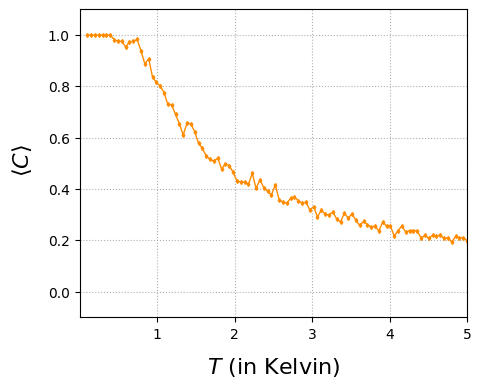

In [18]:
#Correlation function

fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(T, avgC/avgC[0], marker='d', ls='-', ms=2, lw=1, color='darkorange')

ax.set_ylim(-0.1, 1.1)
ax.set_xlim(0.001, 5)

ax.set_xlabel('$T$ (in Kelvin)', fontsize=16, labelpad=10)
ax.set_ylabel(r" $\langle C \rangle $", fontsize=16, labelpad=10)

ax.grid(ls=':')

plt.show()